In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from ipykernel import kernelapp as app
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score

# import sys
# import warnings
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")

In [2]:
DW = np.load("./data/science2k-doc-word.npy")
WD = np.load("./data/science2k-word-doc.npy")

In [3]:
titles = pd.read_table('./data/science2k-titles.txt').values
vocab = pd.read_table('./data/science2k-vocab.txt').values

('For n_clusters =', 2, 'The average silhouette_score is :', 0.05834564900297376)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.023948582508249366)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.02223829004946063)
('For n_clusters =', 5, 'The average silhouette_score is :', -0.0448796798277825)
('For n_clusters =', 6, 'The average silhouette_score is :', -0.012491803610868567)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.003210519554666552)
('For n_clusters =', 8, 'The average silhouette_score is :', -0.032431975101122695)
('For n_clusters =', 9, 'The average silhouette_score is :', -0.027455795214802254)
('For n_clusters =', 10, 'The average silhouette_score is :', -0.008255618234087301)
('For n_clusters =', 11, 'The average silhouette_score is :', -0.04206386742829019)
('For n_clusters =', 12, 'The average silhouette_score is :', -0.021130677609741865)
('For n_clusters =', 13, 'The average silhouette_score is :', -0.01594229122869986

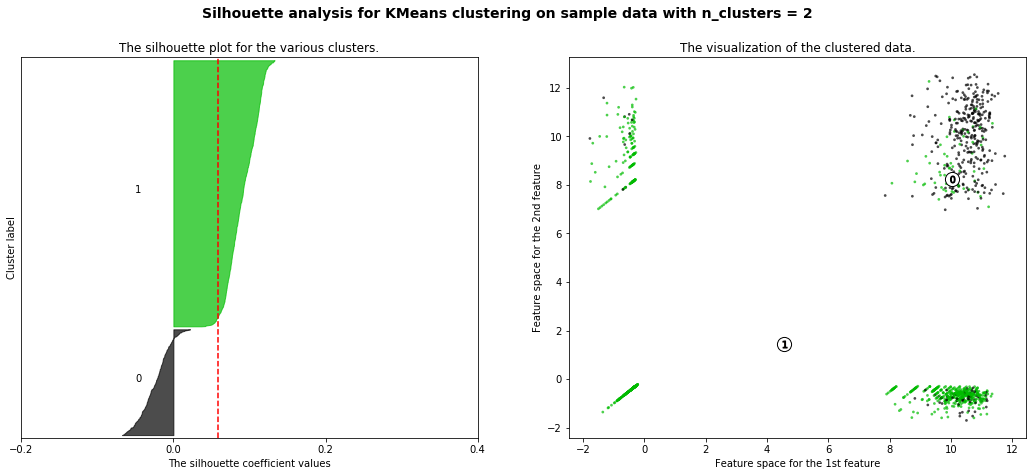

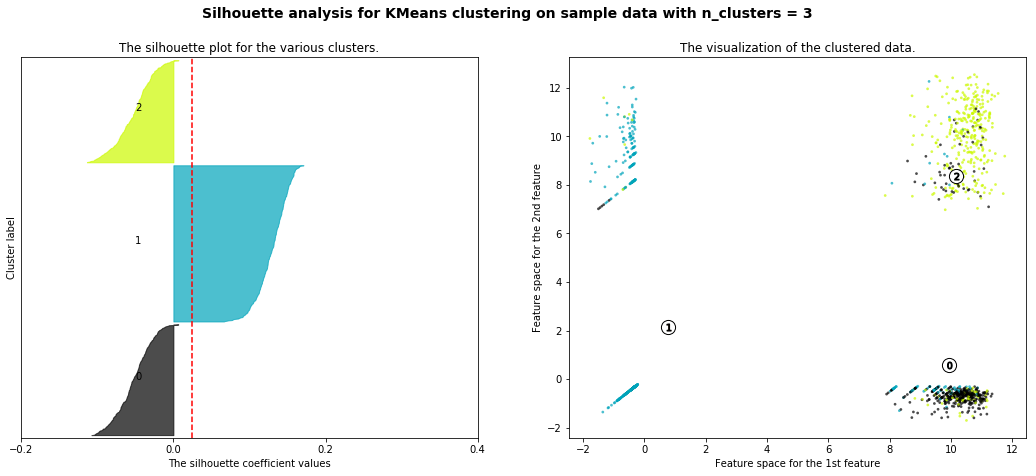

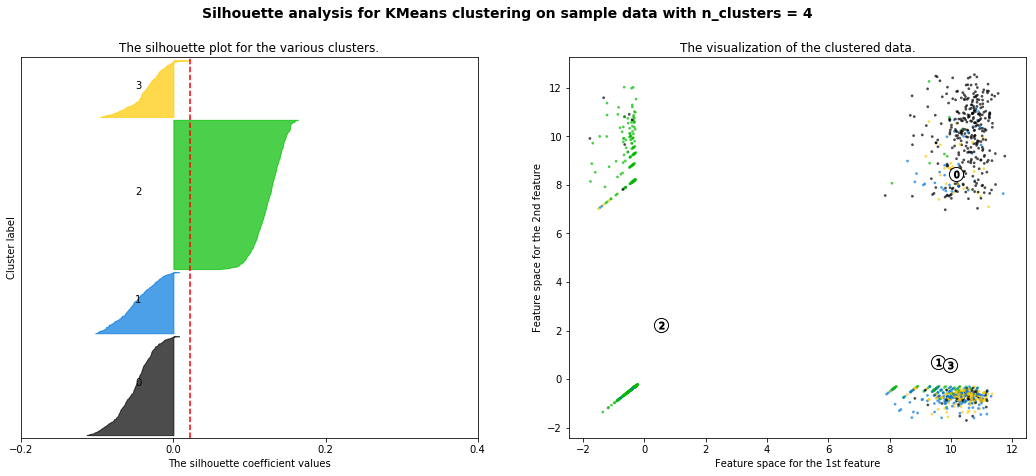

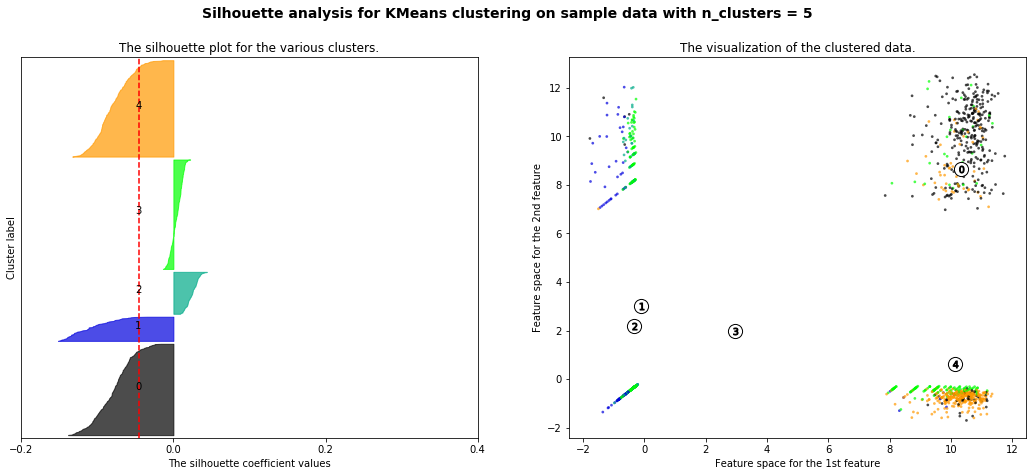

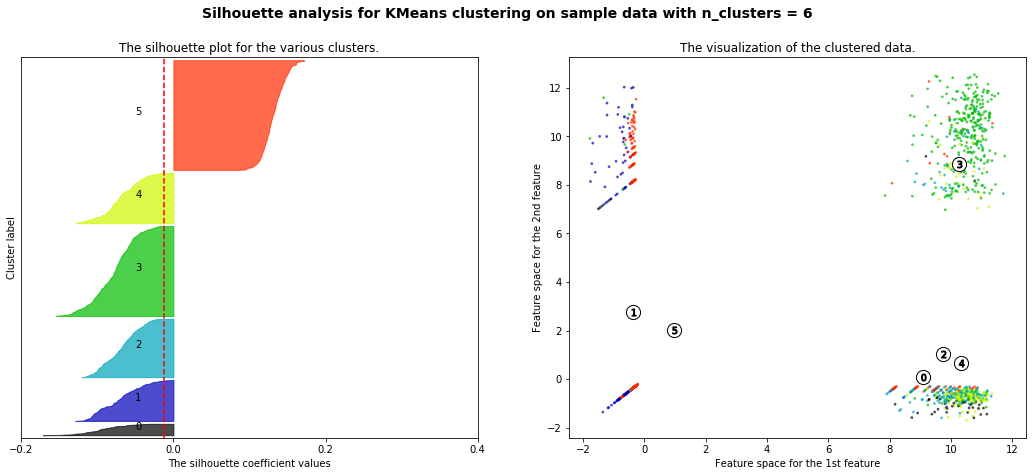

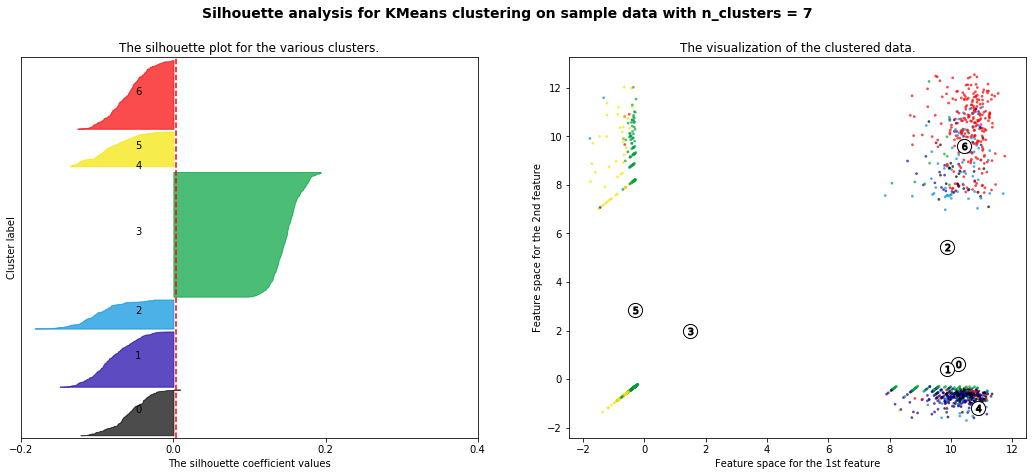

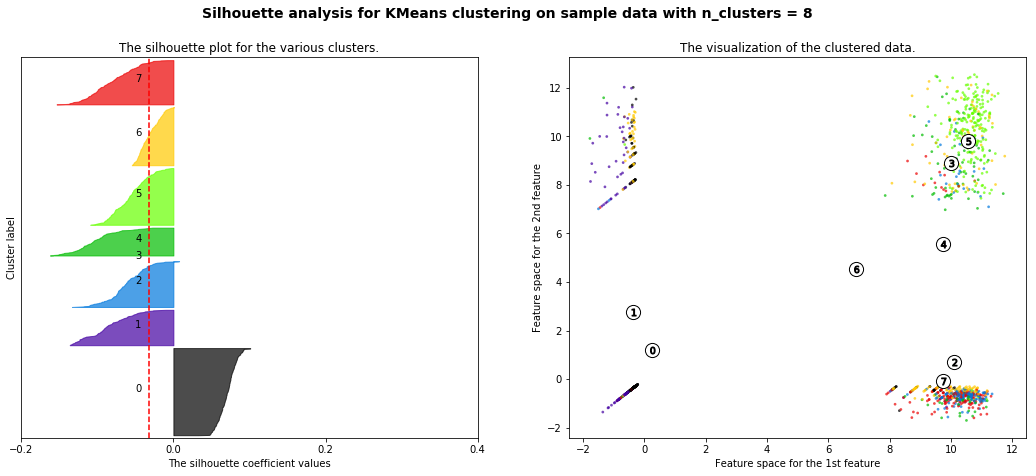

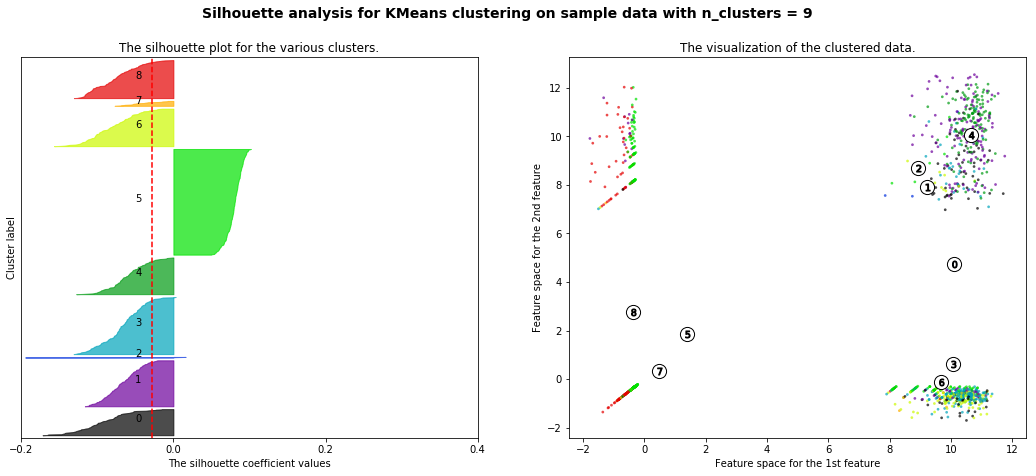

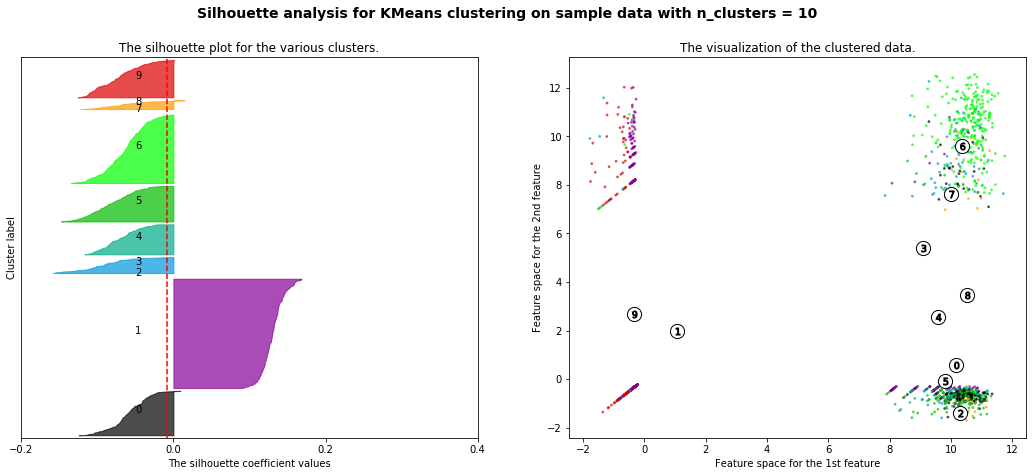

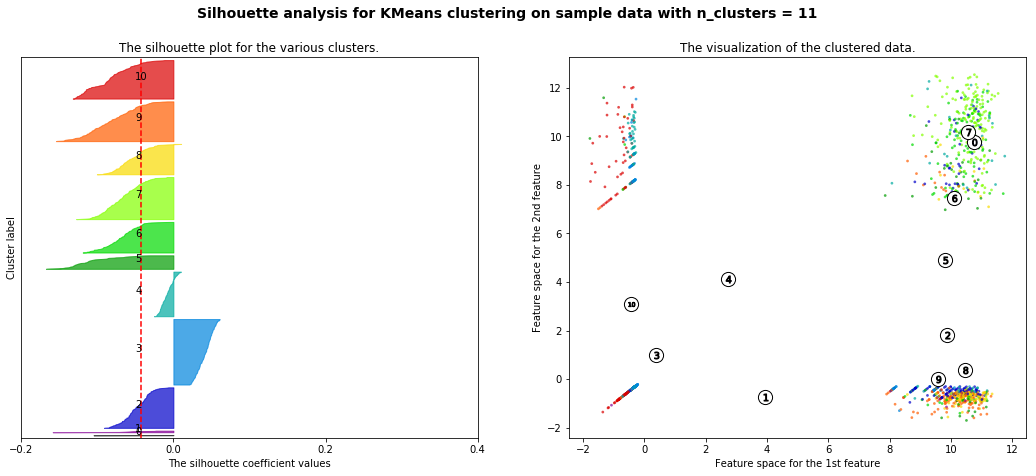

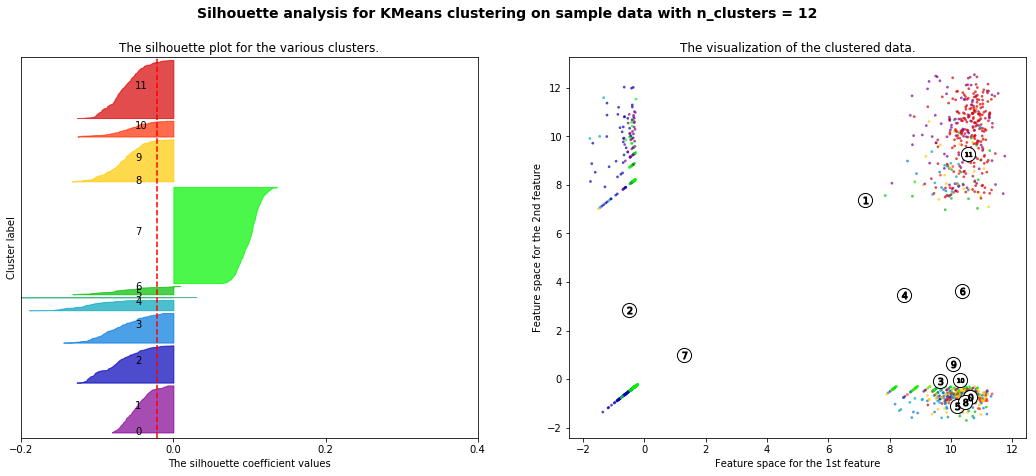

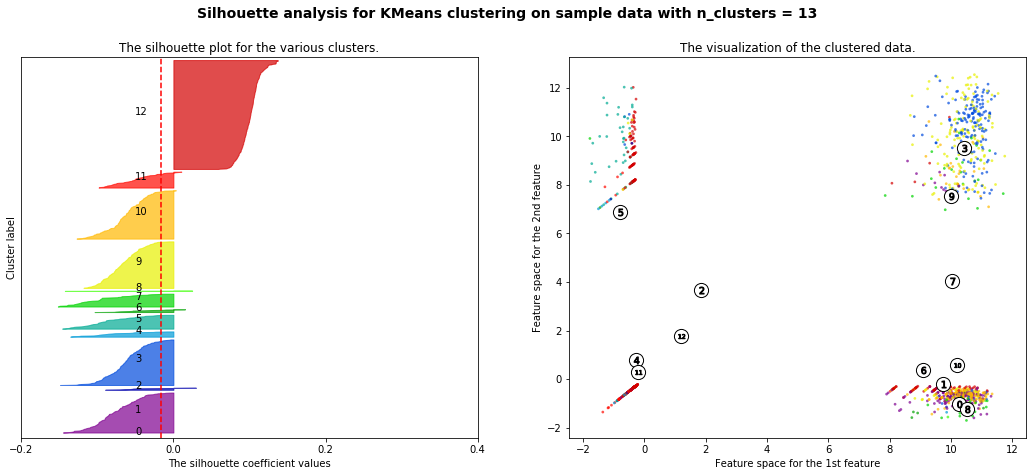

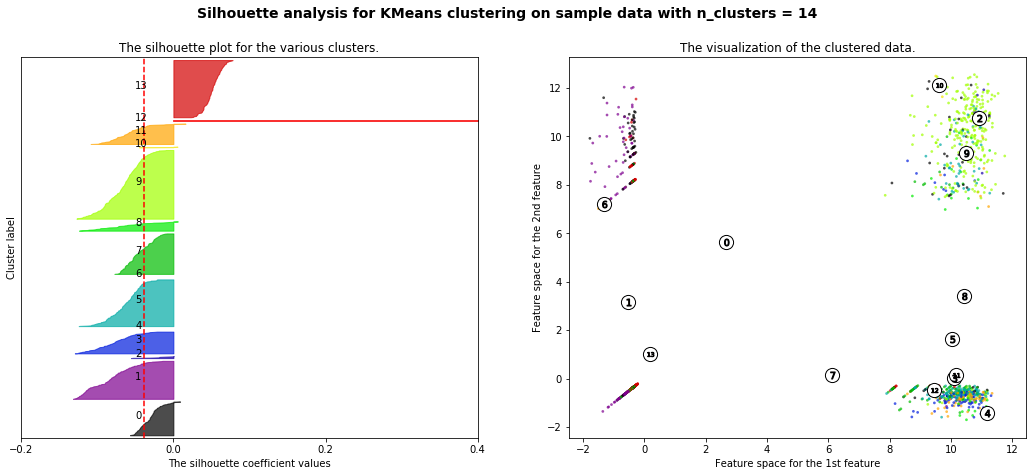

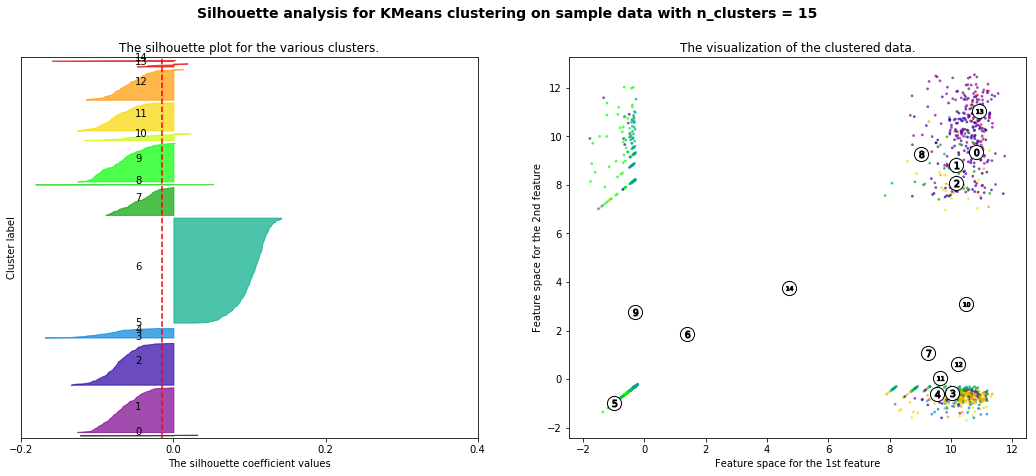

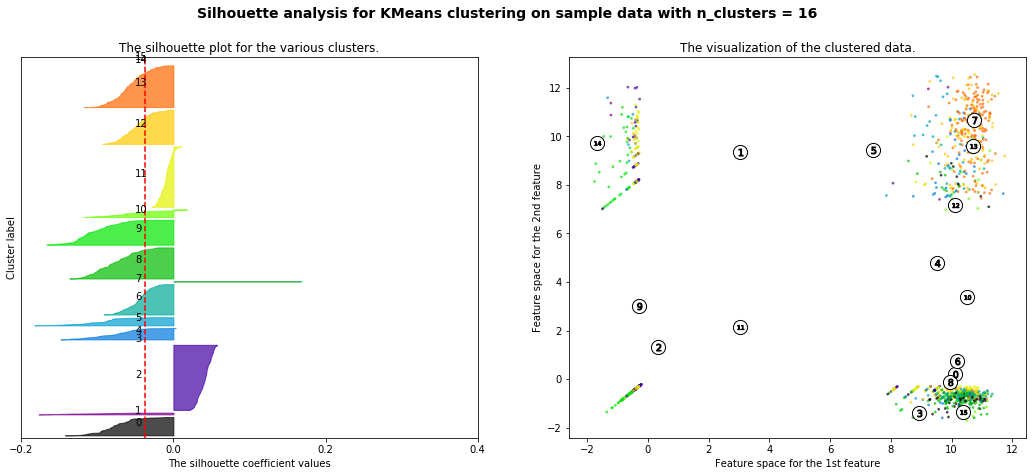

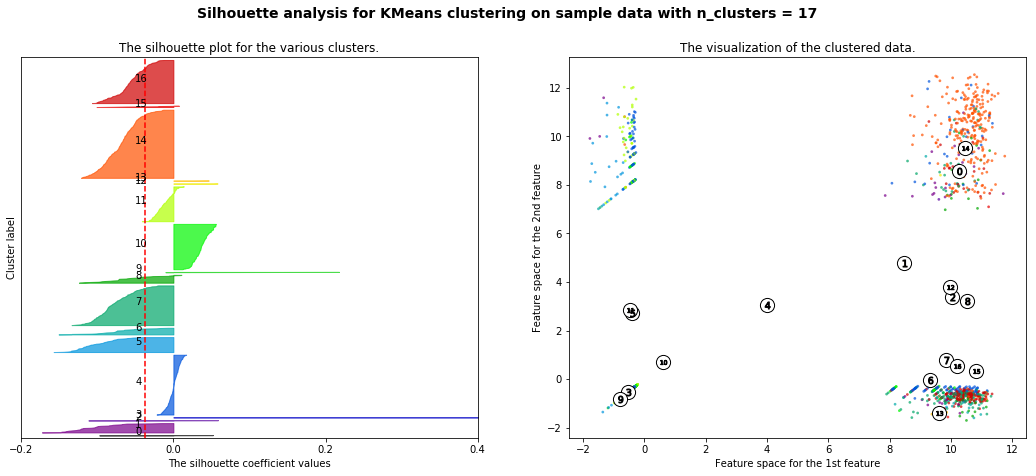

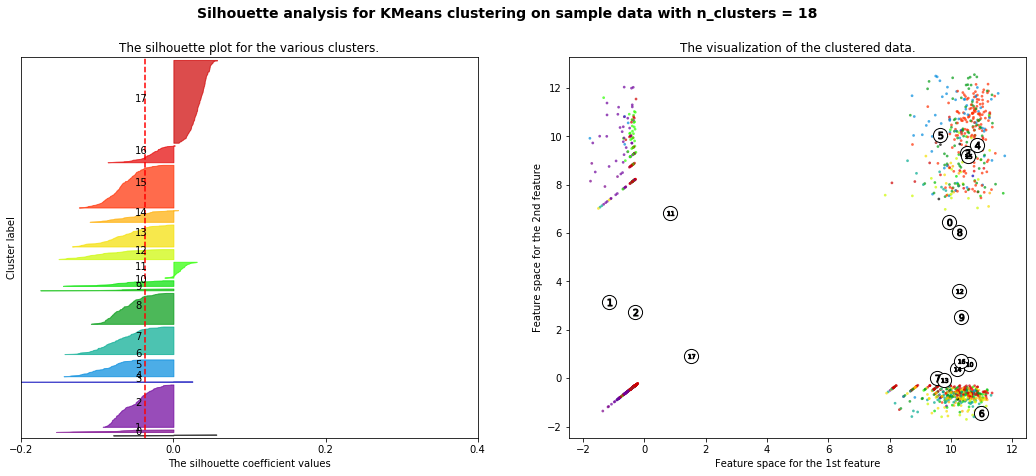

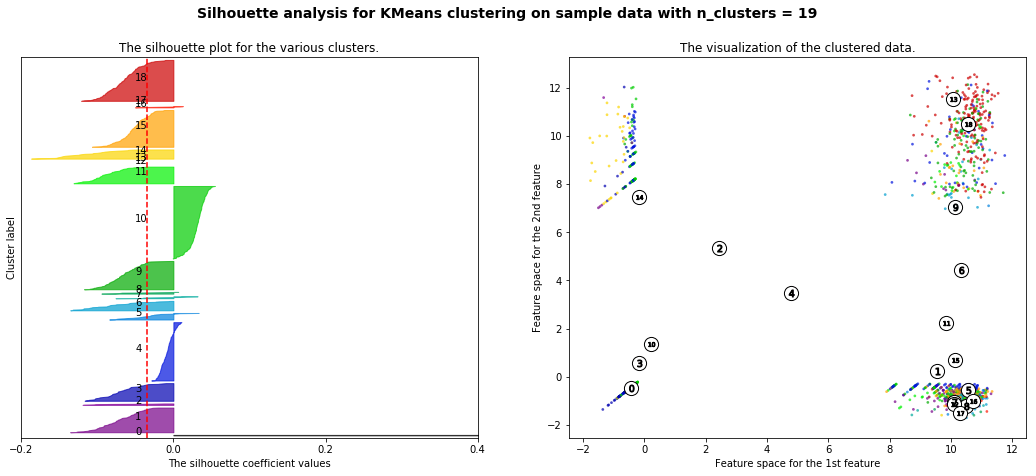

In [4]:
range_n_clusters = [n for n in range(2,20)]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 0.4])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(DW) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state = 0)
    cluster_labels = clusterer.fit_predict(DW)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(DW, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(DW, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(DW[:, 0], DW[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [7]:
inertia_DW,inertia_WD = [],[]
for k in range (1,2):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    inertia_DW.append(kmeans.fit(DW).inertia_)
    inertia_WD.append(kmeans.fit(WD).inertia_)

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

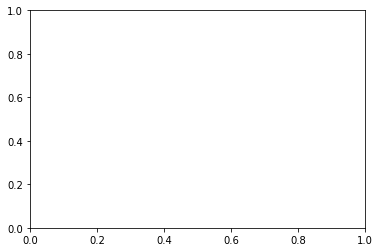

In [8]:
fig, ax = plt.subplots()
ax.plot(range(1,21),inertia_DW,marker = ".", color = 'red')
ax.plot(range(1,21),inertia_WD,marker = ".", color = 'blue')
plt.legend(['doc-word','word-doc'])
plt.show()

In [22]:
#k=6,run k-means
kmeans = KMeans(n_clusters = 6, random_state=0).fit(DW)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
center = np.mean(X,axis=0).reshape(1, -1)

In [23]:
#Top 10 words of each cluster in order of the largest positive distance from the average value across all data
for i in range(0,6):
    farthest = np.argsort(euclidean_distances(X[labels == i],center),axis=0)[:10] #.reshape(1,-1)
    words = np.block([vocab[v] for v in [x for x in farthest]])
    print ('i= %s\nFarthest= %s\nWords= %s' %(i, farthest.reshape(1,-1), words))
    print('--------------------------------------------------')

i= 0
Farthest= [[ 4 11 39 17 20 10 15 30  9  7]]
Words= [['cell' 'vol' 'found' 'new' 'mice' 'sciencemag' 'surface' 'model' 'www'
  'time']]
--------------------------------------------------
i= 1
Farthest= [[ 50  14  73 132 120 114 113 139  18  88]]
Words= [['binding' 'high' 'present' 'growth' 'total' 'molecules' 'animals'
  'role' 'research' 'density']]
--------------------------------------------------
i= 2
Farthest= [[ 80 202 113 204  67  21  79 197 217  59]]
Words= [['table' 'nuclear' 'animals' 'genetic' 'long' 'proteins' 'form' 'test'
  'treated' 'response']]
--------------------------------------------------
i= 3
Farthest= [[254 248 196 326 134 101 180 257  22 276]]
Words= [['yeast' 'ratio' 'models' 'local' 'work' 'lower' 'related' 'flow'
  'expression' 'measurements']]
--------------------------------------------------
i= 4
Farthest= [[150 110 174 113 180  99  39 161  54  67]]
Words= [['age' 'relative' 'identified' 'animals' 'related' 'regions' 'found'
  'sequences' 'phase' 'lon

In [24]:
#Top 10 documents that fall closest to each cluster center
for i in range(0,6):
    closest = np.argsort(euclidean_distances(DW[labels == i],clusters[i].reshape(1, -1)),axis=0)[-10:]
    ts = np.block([titles[t] for t in [x for x in closest]])
    print ('i= %s \nClosest= %s\nTitles = %s' %(i, closest.reshape(1,-1),ts))
    print('--------------------------------------------------')

i= 0 
Closest= [[24  0 27 41  6 31 43 42 21 36]]
Titles = [['Protein Interaction Mapping in C. elegans Using Proteins Involved in Vulval Development'
  "Baedeker's Guide, or Just Plain 'Trouble'?"
  'Sex Determination in Malaria Parasites'
  'Deconstructing the Science Wars by Reconstructing an Old Mold'
  'Brane-Worlds'
  'Stat3-Mediated Transformation of NIH-3T3 Cells by the Constitutively Active Q205L <latex>$G\\alpha_o$</latex> Protein'
  'Organizing Principles for a Diversity of GABAergic Interneurons and Synapses in the Neocortex'
  'Cenozoic Deep-Sea Temperatures and Global Ice Volumes from Mg/Ca in Benthic Foraminiferal Calcite'
  "Evidence for Crystalline Water and Ammonia Ices on Pluto's Satellite Charon"
  'Waiting for Organ Transplantation']]
--------------------------------------------------
i= 1 
Closest= [[ 67 124  17   2  57  26  41  44 151 145]]
Titles = [['A Tail of Histone Acetylation and DNA Recombination'
  'From Turin to Stockholm via St. Louis and Rio de Janeiro'

In [37]:
a = list(range(100))
print(a[1:10])
print(a[:10])
print(a[90:])
print(a[90:-2])
b = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
print(b)
print(b[1:3,:-1])

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[90, 91, 92, 93, 94, 95, 96, 97]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[4 5]
 [7 8]]
